### Comparison of Batch, Mini-Batch and Stochastic Gradient Descent

#### References:
- [Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow](https://github.com/ageron/handson-ml2/blob/master/extra_gradient_descent_comparison.ipynb)

<a href="https://colab.research.google.com/github/paulaceccon/dl-from-scratch/blob/main/notebooks/gradient_descent.ipynb" target="_parent" style="float: left;"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

%matplotlib nbagg

In [2]:
m = 100  # number of training instances
X = 2 * np.random.rand(m, 1)  # input vector (1d for visualization purposes)
X_b = np.c_[np.ones((m, 1)), X]  # adding bias term
y = 4 + 3 * X + np.random.rand(m, 1)  # target vector

- Linear Regression model prediction

$\hat{y} = \theta_0 +\theta_1 \cdot x_1 + \cdots + \theta_n \cdot x_n = \theta^T \cdot \mathbf{X}$

- Cost function:

$\text{MSE} (\theta) = \frac{1}{m}\sum_{i=1}^{m}(\theta^T \cdot \mathbf{x}^{i}-y^{i})$

- Derivative of cost function:

$\frac{\delta}{\delta \theta_j} \text{MSE} (\theta) = \frac{2}{m}\sum_{i=1}^{m}(\theta^T \cdot \mathbf{x}^{i} - y^{i}) x_{j}^{i} = \frac{2}{m} \mathbf{X}^T \cdot (\mathbf{X} \cdot \theta - \mathbf{y})$

In [3]:
def learning_schedule(t: int, t0: float, t1: float):
    """
    Calculates the learning schedule

    Args:
        t: current epoch
        t0: initial learning rate
        l1: final learning rate
    Returns:
        learning rate for current epoch
    """
    return t0 / (t + t1)


def compute_mse(theta: np.ndarray):
    """Calulates the MSE"""
    return np.sum((np.dot(X_b, theta) - y) ** 2) / m


def initialize_thetas() -> tuple[np.ndarray, list[np.ndarray]]:
    """Generates random thetas"""
    thetas = np.random.randn(2, 1)
    thetas_path = [thetas]

    return thetas, thetas_path


def mse_gradients(X_b: np.ndarray, y: np.ndarray, m: int, thetas: np.ndarray):
    """Calculates the MSE gradients"""
    return 2 * X_b.T.dot(X_b.dot(thetas) - y) / m

In [4]:
def batch_gradient_descent(n_iterations: int = 1000, learning_rate: float = 0.05):
    """Batch gradient descent"""
    thetas, thetas_path = initialize_thetas()
    for _ in range(n_iterations):
        gradients = mse_gradients(X_b, y, m, thetas)
        thetas = thetas - learning_rate * gradients
        thetas_path.append(thetas)

    return thetas_path

In [5]:
def stochastic_gradient_descent(n_epochs: int = 50, t0: float = 5, t1: float = 50):
    """Stochastic gradient descent"""
    thetas, thetas_path = initialize_thetas()
    for epoch in range(n_epochs):  # iterate by rounds of m iterations
        for i in range(m):
            random_index = np.random.randint(m)  # random sample
            xi = X_b[random_index : random_index + 1]
            yi = y[random_index : random_index + 1]
            gradients = mse_gradients(xi, yi, 1, thetas)
            eta = learning_schedule(epoch * m + i, t0, t1)
            thetas = thetas - eta * gradients
            thetas_path.append(thetas)

    return thetas_path

In [6]:
def mini_batch_gradient_descent(
    n_iterations: int = 50,
    minibatch_size: int = 20,
    t: int = 0,
    t0: float = 200,
    t1: float = 1000,
):
    """Mini-batch gradient descent"""
    thetas, thetas_path = initialize_thetas()
    for _ in range(n_iterations):
        shuffled_indices = np.random.permutation(m)  # whole data set
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, m, minibatch_size):
            t += 1
            xi = X_b_shuffled[i : i + minibatch_size]
            yi = y_shuffled[i : i + minibatch_size]
            gradients = mse_gradients(xi, yi, minibatch_size, thetas)
            eta = learning_schedule(t, t0, t1)
            thetas = thetas - eta * gradients
            thetas_path.append(thetas)

    return thetas_path

In [7]:
theta0, theta1 = np.meshgrid(np.arange(0, 5, 0.1), np.arange(0, 5, 0.1))
cost_map = np.zeros_like(theta0)
for i in range(cost_map.shape[0]):
    for j in range(cost_map.shape[1]):
        theta = np.array([theta0[i, j], theta1[i, j]])
        cost_map[i, j] = compute_mse(theta)

In [8]:
exact_solution = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  # too costly
bgd_thetas = np.array(batch_gradient_descent())
sgd_thetas = np.array(stochastic_gradient_descent())
mbgd_thetas = np.array(mini_batch_gradient_descent())

#### Visualization

In [15]:
def animate(i):
    data_ax.cla()
    cost_ax.cla()

    data_ax.plot(X, y, "k.")

    cost_ax.plot(exact_solution[0, 0], exact_solution[1, 0], "y*")
    cost_ax.pcolor(theta0, theta1, cost_map)

    data_ax.plot(X, X_b.dot(bgd_thetas[i, :]), "r-")
    cost_ax.plot(bgd_thetas[:i, 0], bgd_thetas[:i, 1], "r--")

    data_ax.plot(X, X_b.dot(sgd_thetas[i, :]), "g-")
    cost_ax.plot(sgd_thetas[:i, 0], sgd_thetas[:i, 1], "g--")

    data_ax.plot(X, X_b.dot(mbgd_thetas[i, :]), "b-")
    cost_ax.plot(mbgd_thetas[:i, 0], mbgd_thetas[:i, 1], "b--")

    data_ax.set_xlim([0, 2])
    data_ax.set_ylim([0, 15])
    cost_ax.set_xlim([0, 5])
    cost_ax.set_ylim([0, 5])

    data_ax.set_xlabel(r"$x_1$")
    data_ax.set_ylabel(r"$y$", rotation=0)
    cost_ax.set_xlabel(r"$\theta_0$")
    cost_ax.set_ylabel(r"$\theta_1$")

    data_ax.legend(("Data", "BGD", "SGD", "MBGD"), loc="upper left")
    cost_ax.legend(("Normal Equation", "BGD", "SGD", "MBGD"), loc="upper left")

<IPython.core.display.Javascript object>


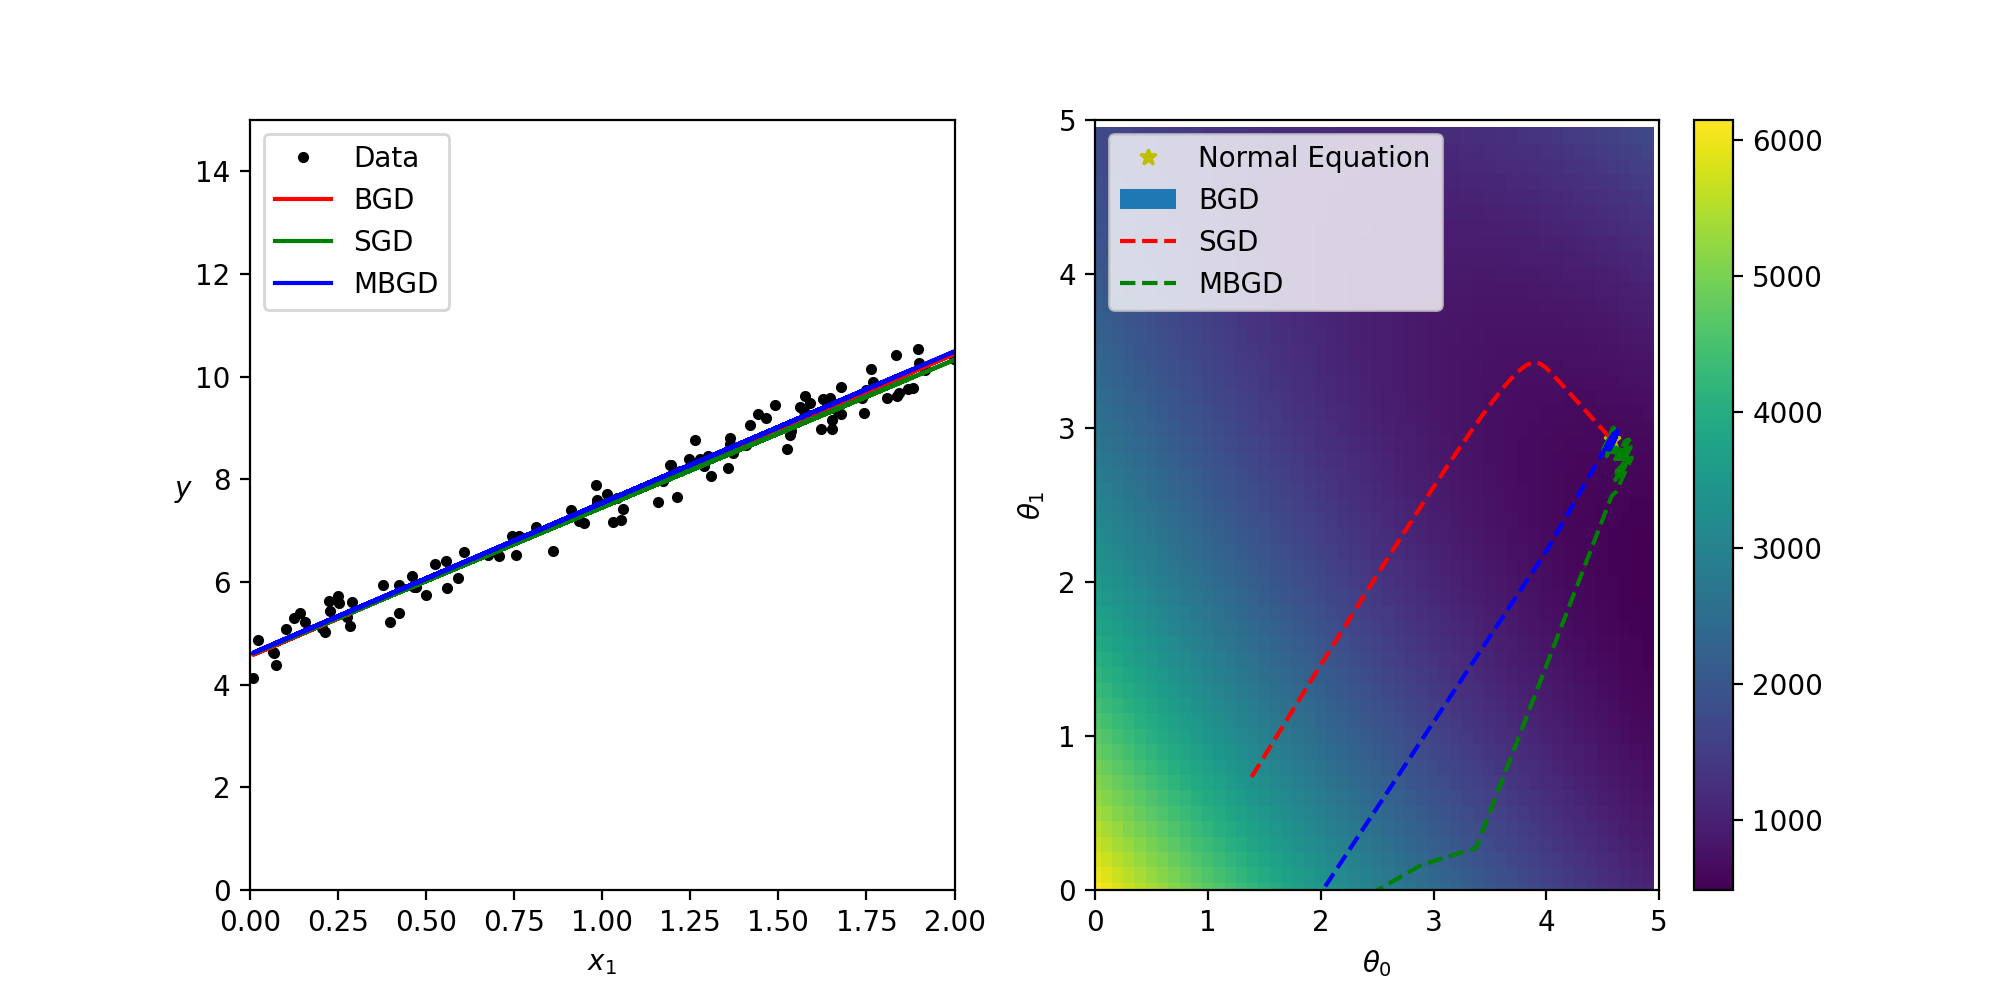

In [16]:
bgd_len = len(bgd_thetas)
sgd_len = len(sgd_thetas)
mbgd_len = len(mbgd_thetas)
n_iter = min(bgd_len, sgd_len, mbgd_len)

fig = plt.figure(figsize=(10, 5))
data_ax = fig.add_subplot(121)
cost_ax = fig.add_subplot(122)

cost_ax.plot(exact_solution[0, 0], exact_solution[1, 0], "y*")
cost_img = cost_ax.pcolor(theta0, theta1, cost_map)
fig.colorbar(cost_img)
animation = FuncAnimation(fig, animate, frames=n_iter);